## Examen final - 13/05/2024

### Ejercicio 1

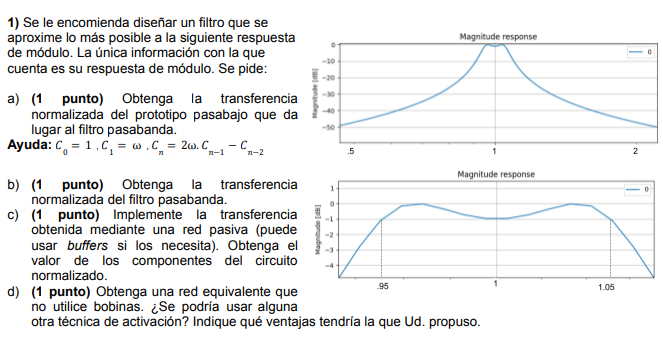

En el caso de este ejercicio, se adjunta el desarrollo completo manuscrito y luego se vuelve a trabajar, sección por sección descripto en Markdown y simulado

##### Desarrollo tradicional

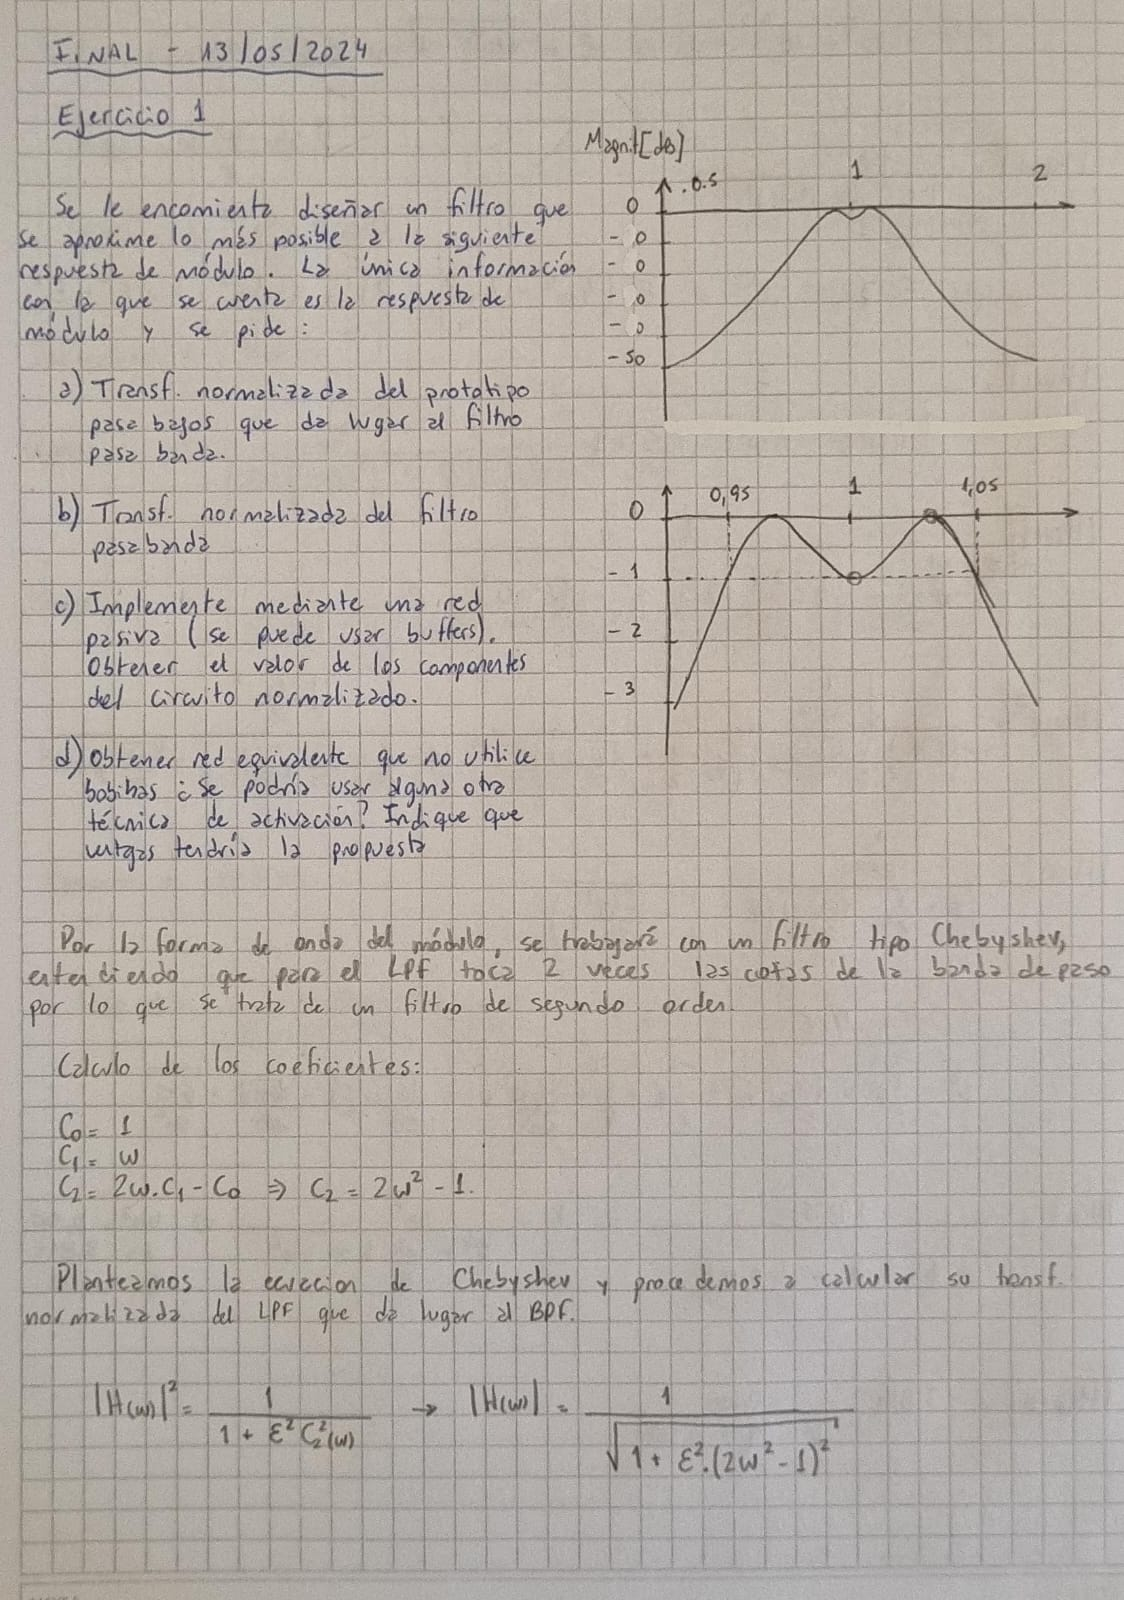

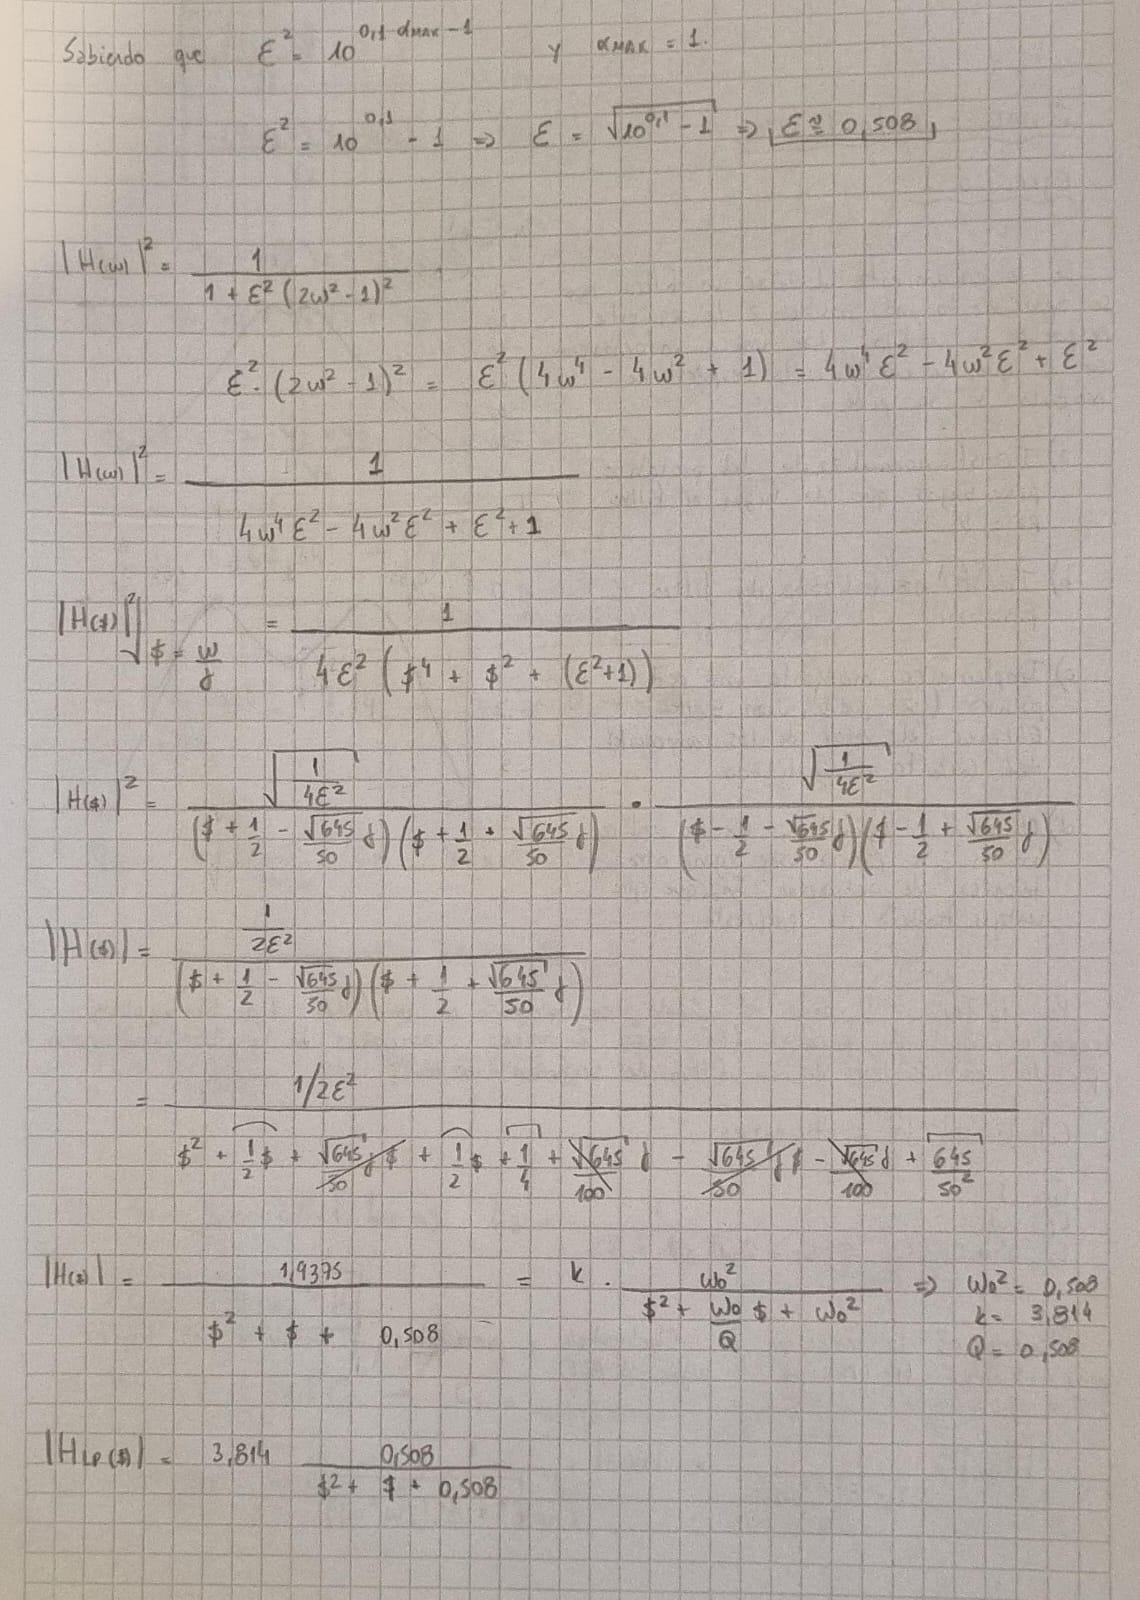

Epsilon: 0.5088471399095875


C:\Users\Mati\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\signal\_filter_design.py:1112: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  b, a = normalize(b, a)


<IPython.core.display.Math object>

C:\Users\Mati\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\signal\_ltisys.py:599: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  self.num, self.den = normalize(*system)


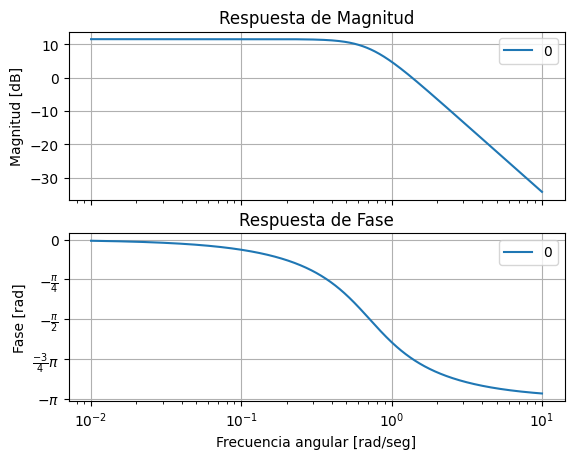

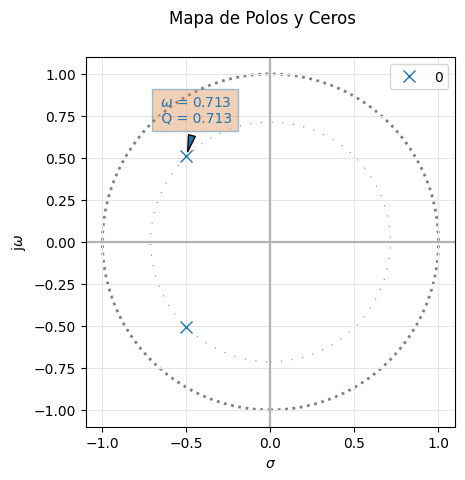

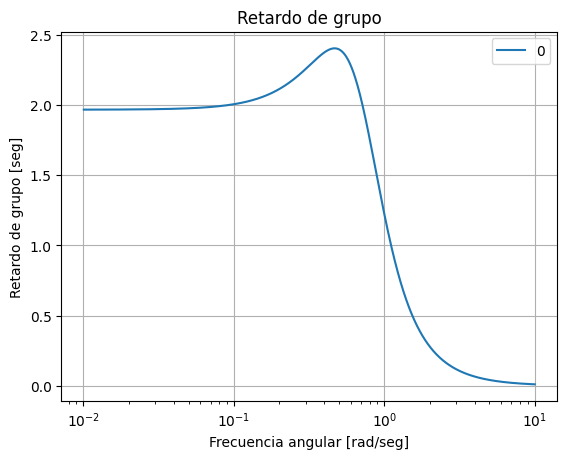

In [26]:
import numpy as np
from pytc2.sistemas_lineales import tf2sos_analog, analyze_sys, pretty_print_SOS
import scipy.signal as sig
import math

epsilon = math.sqrt(10**0.1 - 1)
print("Epsilon: " + str(epsilon))

# Definición de una implementación de analyze_sys para evitar logueos innecesarios, mejorando la prolijidad.
def analyze_sys_silent(all_sys, sys_name=None, img_ext='none', same_figs=True, annotations=True, xaxis='omega', fs=2*np.pi):
    analyze_sys(all_sys, sys_name=None, img_ext='none', same_figs=True, annotations=True, xaxis='omega', fs=2*np.pi)
    return

kn = (1 / (2 * epsilon**2)) / epsilon
kp = 1

# Con los datos definidos anteriormente, se arman los array de la transferencia.
num = kn * np.array([0, 0, epsilon])
den = kp * np.array([1, 1, epsilon])
tf_bicuad_sos = tf2sos_analog( num, den )

# Imprimir en formato latex la transferencia
pretty_print_SOS(tf_bicuad_sos)

# Plotear de forma silenciosa las características de mi función 
analyze_sys_silent([sig.TransferFunction(num,den)], 'mi_bicuad', same_figs=False)

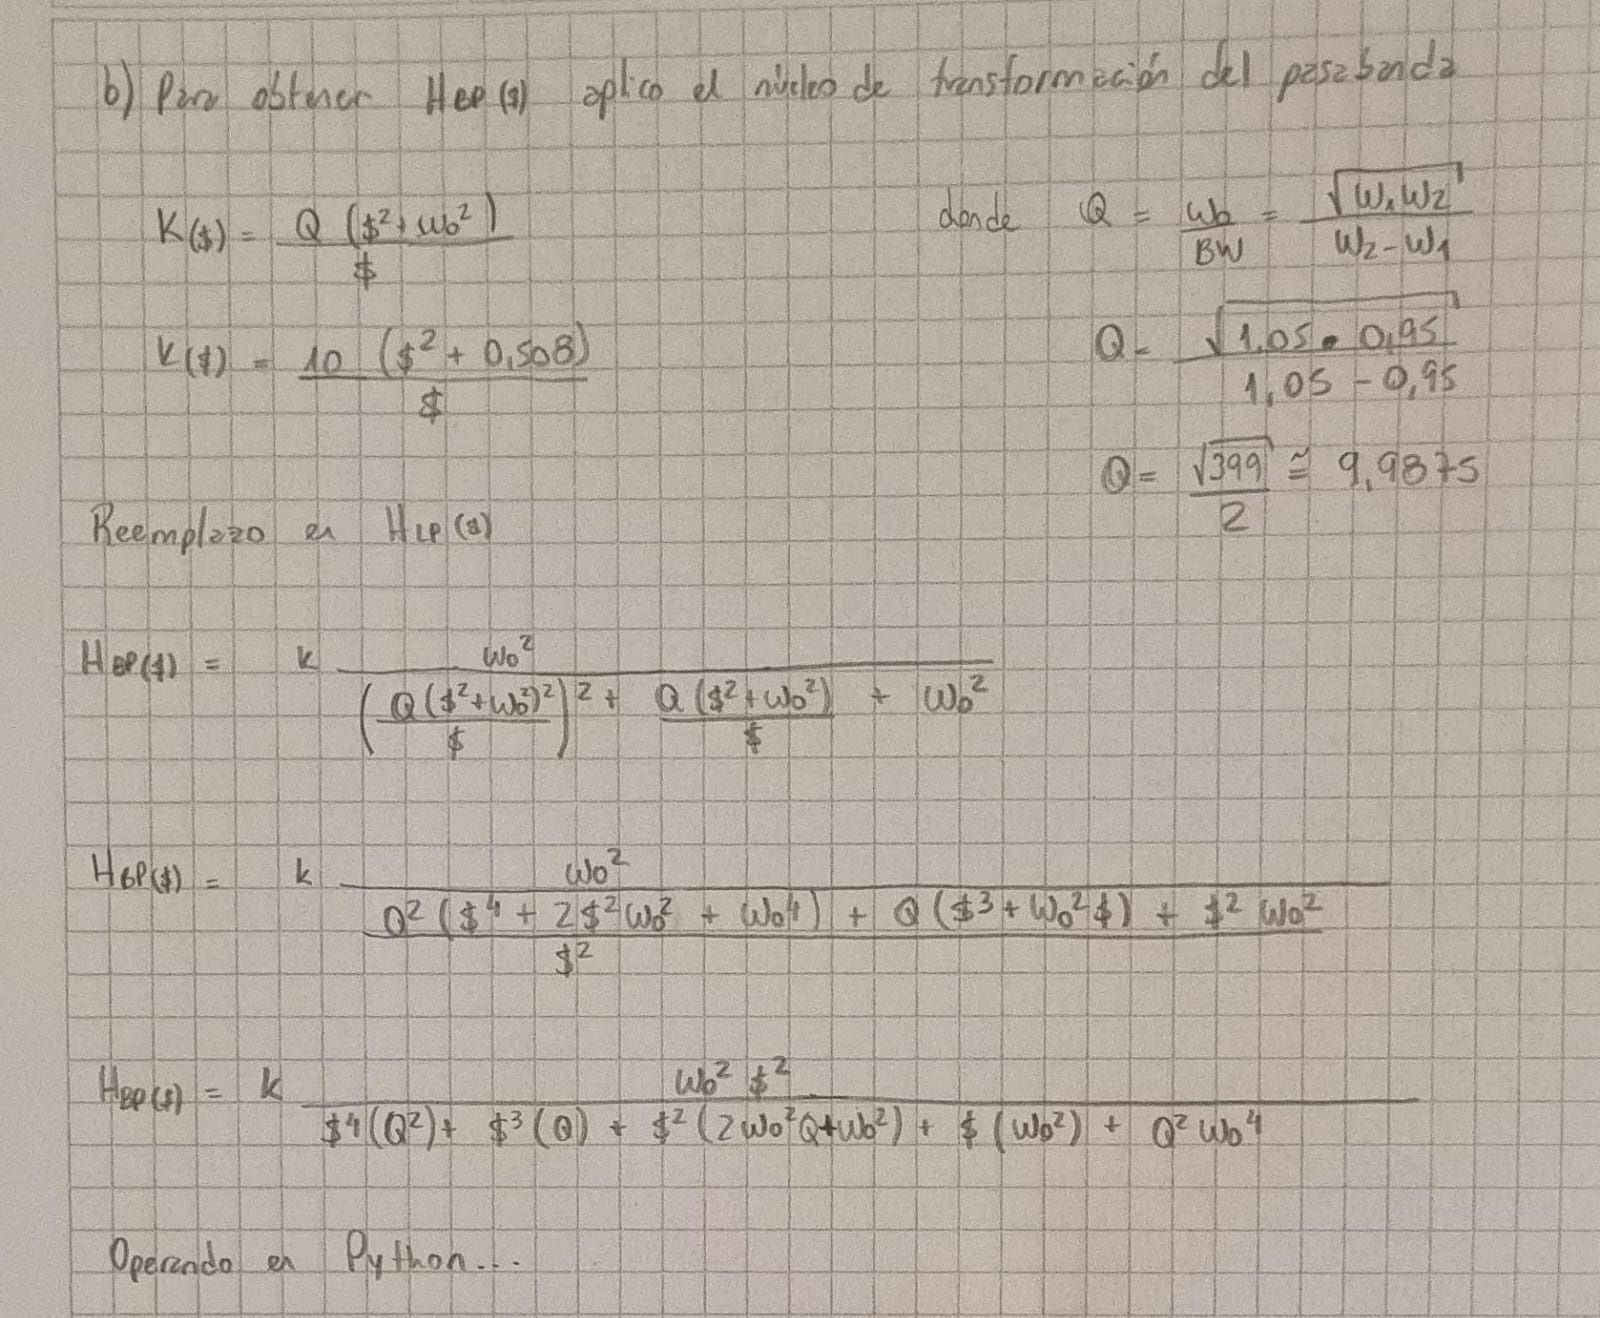

k = 3.7949668878436076
Q = 9.98749217771908


<IPython.core.display.Math object>

[[1,
  array([<Axes: title={'center': 'Respuesta de Magnitud'}, ylabel='Magnitud [dB]'>,
         <Axes: title={'center': 'Respuesta de Fase'}, xlabel='Frecuencia angular [rad/seg]', ylabel='Fase [rad]'>],
        dtype=object)],
 [2, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>],
 ['none', []],
 [3,
  <Axes: title={'center': 'Retardo de grupo'}, xlabel='Frecuencia angular [rad/seg]', ylabel='Retardo de grupo [seg]'>]]

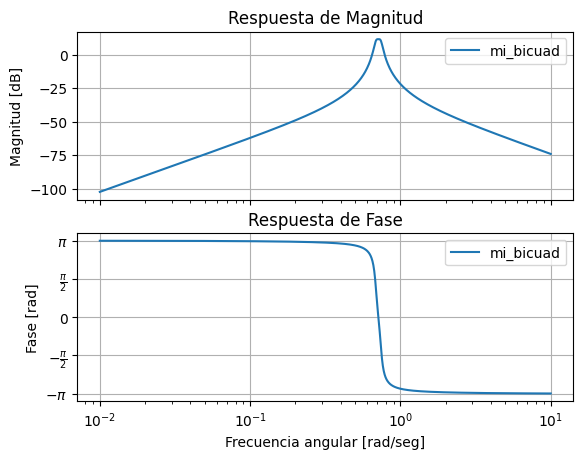

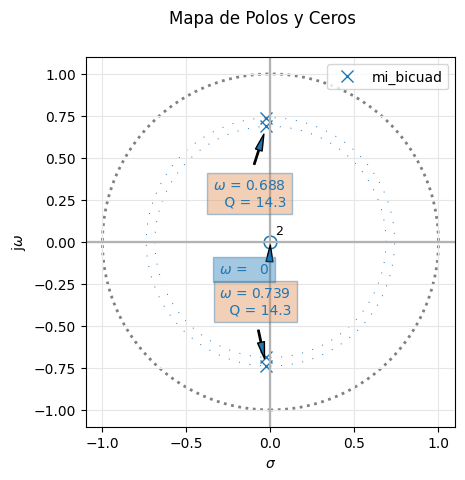

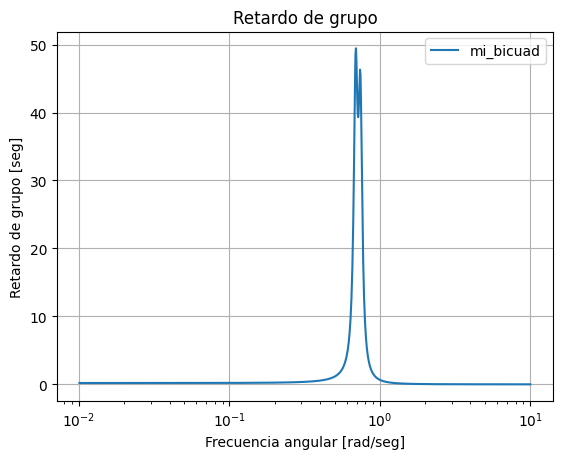

In [20]:
import math
from pytc2.sistemas_lineales import tf2sos_analog, analyze_sys, pretty_print_SOS
import scipy.signal as sig

# Definición de una implementación de analyze_sys para evitar logueos innecesarios, mejorando la prolijidad.
def analyze_sys_silent(all_sys, sys_name=None, img_ext='none', same_figs=True, annotations=True, xaxis='omega', fs=2*np.pi):
    analyze_sys(all_sys, sys_name=None, img_ext='none', same_figs=True, annotations=True, xaxis='omega', fs=2*np.pi)
    return

w_0 = math.sqrt(epsilon)

k = (1 / (2 * epsilon**2)) / epsilon
print("k = " + str(k))

w1 = 0.95
w2 = 1.05

Q = (math.sqrt(w1*w2)/(w2-w1))
print("Q = " + str(Q))


# Calculamos los coeficientes del denominador para mayor claridad.
A = Q**2
B = Q
C = ((2 * w_0**2 * Q**2) + (w_0**2))
D = w_0**2 * Q
E = Q**2 * w_0**4

# Con los datos definidos anteriormente, se arman los array de la transferencia.
kn = k
kp = 1
num = kn * np.array([w_0**2, 0, 0])
den = kp * np.array([A, B, C, D, E])
tf_bicuad_sos = tf2sos_analog( num, den )

# Imprimir en formato latex la transferencia
pretty_print_SOS(tf_bicuad_sos)

# Plotear de forma silenciosa las características de mi función 
analyze_sys([sig.TransferFunction(num,den)], 'mi_bicuad', same_figs=False)